In [37]:
import numpy as np

import cv2
import os
from tensorflow import keras

from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.metrics import categorical_accuracy

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
from tensorflow.keras.models import Model
#from tensorflow.keras.applications import VGG16
#from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import  MobileNetV2


KeyboardInterrupt



In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Read the images, split into training and test sets

In [5]:
training_dir = "Train/"

categories = ['0', '1', '2', '3', '4', '5', '6']

In [6]:
def read_images(training_dir, categories, img_size=224):
    images = []
    img_size = img_size

    for cat in categories:
        path = os.path.join(training_dir, cat)
        class_num = categories.index(cat)
        print(cat, class_num)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_img = cv2.resize(img_array, (img_size, img_size))
            
            #gray_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
            #rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)
            #images.append([gray_img, class_num])
            images.append([new_img, class_num])

    return images

In [7]:
images = read_images(training_dir, categories, img_size=224)

0 0
1 1
2 2
3 3
4 4
5 5
6 6


In [8]:
len(images)

3357

In [9]:
X = []
y = []

for pict, label in images:
    X.append(pict)
    y.append(label)


In [10]:
np.array(X).shape

(3357, 224, 224, 3)

In [11]:
X = np.array(X)

In [12]:
X = X / 255.0

In [13]:
y = np.array(y)

In [14]:
y.shape

(3357,)

In [15]:
X.shape

(3357, 224, 224, 3)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(2685, 224, 224, 3)

## Use pre-trained MobileNetV2 model - transfer learning

In [18]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [49]:
# base_model.summary()

In [19]:
base_input = base_model.layers[0].input
base_output = base_model.layers[-3].output

In [20]:
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

**Add custom layers at the end**

In [23]:
final_output = GlobalAveragePooling2D()(base_output)
final_output = layers.Dense(128, activation='relu')(final_output)
final_output = layers.Dense(64, activation='relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

new_model = keras.Model(inputs=base_input, outputs=final_output)

In [24]:
new_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [25]:
history = new_model.fit(
  X_train,
  to_categorical(y_train), 
  epochs=20, 
  batch_size=32, 
)

Epoch 1/20


84/84 [==============================] - 178s 2s/step - loss: 1.7769 - accuracy: 0.3162
Epoch 2/20
84/84 [==============================] - 163s 2s/step - loss: 1.3885 - accuracy: 0.4588
Epoch 3/20
84/84 [==============================] - 166s 2s/step - loss: 1.1711 - accuracy: 0.5579
Epoch 4/20
84/84 [==============================] - 158s 2s/step - loss: 1.0120 - accuracy: 0.6175
Epoch 5/20
84/84 [==============================] - 161s 2s/step - loss: 0.9206 - accuracy: 0.6615
Epoch 6/20
84/84 [==============================] - 161s 2s/step - loss: 0.7896 - accuracy: 0.7084
Epoch 7/20
84/84 [==============================] - 163s 2s/step - loss: 0.6491 - accuracy: 0.7743
Epoch 8/20
84/84 [==============================] - 160s 2s/step - loss: 0.5673 - accuracy: 0.8056
Epoch 9/20
84/84 [==============================] - 167s 2s/step - loss: 0.4781 - accuracy: 0.8350
Epoch 10/20
84/84 [==============================] - 169s 2s/step - loss: 0.4637 - accuracy: 0.8372
Epoch 1

In [26]:
test_loss, test_accuracy = new_model.evaluate(X_test, to_categorical(y_test))

21/21 [==============================] - 10s 424ms/step - loss: 6.5971 - accuracy: 0.2649


In [27]:
y_pred = new_model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

21/21 [==============================] - 9s 407ms/step


In [29]:
cf = confusion_matrix(y_test, y_pred_labels) #row 26
cf

array([[47, 57,  1,  2,  3,  1,  7],
       [28, 63,  1,  1,  0,  0,  3],
       [14, 51, 12,  2,  3,  5,  0],
       [ 9, 55,  0, 23,  0,  2,  6],
       [17, 44,  3,  1,  1,  3, 18],
       [29, 41,  4,  2,  0, 15,  5],
       [33, 34,  2,  3,  0,  4, 17]], dtype=int64)

In [30]:
new_model.save("Models/CNN_pre_trained.keras")

In [49]:
loaded_model = tf.keras.models.load_model("Models/CNN_pre_trained.keras")

img_array = cv2.imread("happy_pic_1.jpg")

new_img = cv2.resize(img_array, (224,224))

new_img.shape

new_img = new_img / 255.0

new_img = np.expand_dims(new_img, axis=0)

y_pred = loaded_model.predict(new_img)

np.argmax(y_pred, axis=1)

y_pred

In [7]:
#import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.models import model_from_json

from tensorflow.keras.metrics import categorical_accuracy

In [1]:
json_file = open('GitHub_Model/model_structure.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [3]:
# loaded_model_json

In [21]:
# loaded_model = tf.keras.models.load_model("GitHub_Model/model_4layer_2_2_pool.h5")

In [5]:
loaded_model = model_from_json(loaded_model_json)

In [6]:
loaded_model.load_weights("GitHub_Model/model_4layer_2_2_pool.h5")

In [9]:
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[categorical_accuracy])

In [44]:
#loaded_model.summary()

In [35]:
gray_image.shape

(48, 48)

In [36]:
r = gray_image.reshape(1, 48, 48, 1)


In [37]:
r.shape

(1, 48, 48, 1)

In [38]:
predictions = loaded_model.predict(r)

1/1 [==============================] - 0s 41ms/step


In [39]:
predictions

array([[0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [29]:
img_array = cv2.imread("img/angry.jpg")

In [30]:
new_img = cv2.resize(img_array, (48,48))

In [31]:
img_array.shape, new_img.shape

((573, 573, 3), (48, 48, 3))

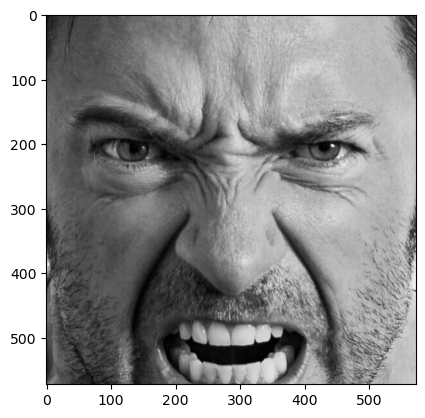

In [32]:
plt.imshow(img_array)

In [33]:
gray_image = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)

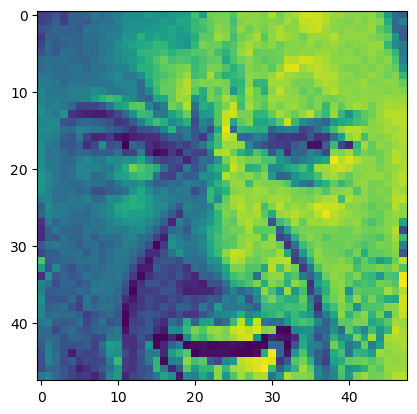

In [34]:
plt.imshow(gray_image)

In [25]:
img_48 = cv2.imread("5_FER-2013_Train_Test/train/1_selected/0/Training_11888118.jpg")

In [17]:
img_48.shape

(48, 48, 3)

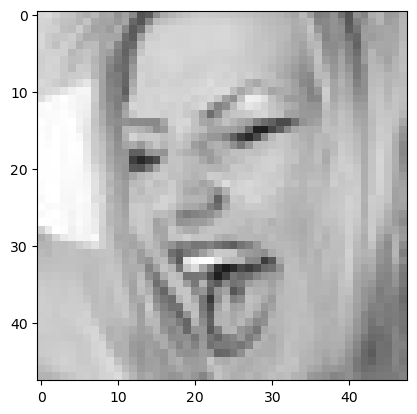

In [26]:
plt.imshow(img_48)

In [31]:
img_48_big = cv2.resize(img_48, (224,224))

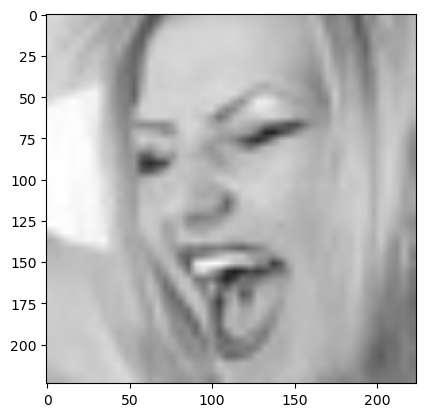

In [32]:
plt.imshow(img_48_big)

In [21]:
 img_48_big_2 = cv2.resize(img_48, (64,64), interpolation=cv2.INTER_CUBIC)

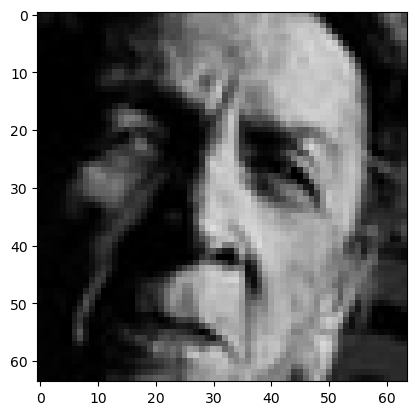

In [22]:
plt.imshow(img_48_big_2)

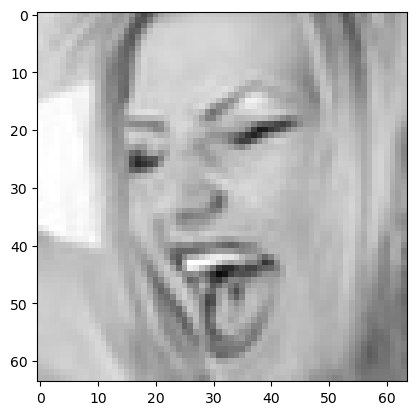

In [29]:
img_48_big_3 = cv2.resize(img_48, (64,64), interpolation=cv2.INTER_LANCZOS4)
plt.imshow(img_48_big_3)

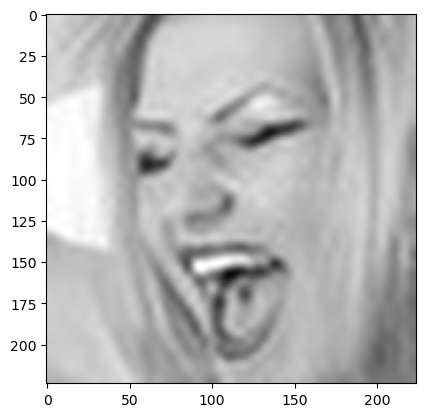

In [30]:
img_48_big_4 = cv2.resize(img_48, (224,224), interpolation=cv2.INTER_LANCZOS4)
plt.imshow(img_48_big_4)

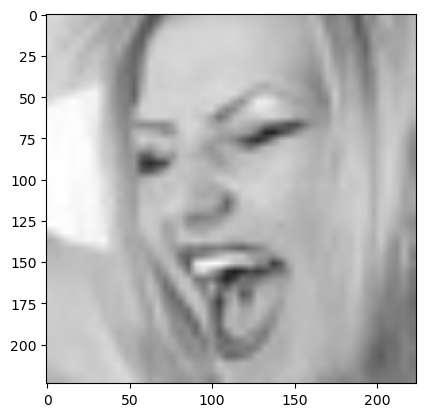

In [33]:
plt.imshow(img_48_big)

In [ ]:
def split_images_into_X_y_resize(images, img_size=224):
    X = []
    y = []

    for pict, label in images:
        new_img = cv2.resize(pict, (img_size, img_size))
        X.append(new_img)
        y.append(label)

    X = np.array(X, dtype=np.float32) / 255.0
    y = np.array(y)

    return X, y
    

In [35]:
from tensorflow.keras.models import load_model

In [42]:
# loaded_CNN = load_model('Models/CNN_deep_github.keras') 

In [ ]:
model.save('Models/CNN_deep_github.keras')
loaded_CNN = load_model('Models/CNN_deep_github.keras') 

In [39]:
import keras
print(keras.__version__)

2.15.0


In [40]:
import tensorflow as tf
print(tf.__version__)

2.15.0
